In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap



from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from model_vizualisation_data import ModelVizualizationData

In [80]:
df = pd.read_csv('Data/df_cleaned.csv', sep=",")
df.shape

(1512, 33)

### 1. Preparaing Data for Models

In [ ]:
df['Energy_Loss(kBtu/sf)'] =  (df['SourceEUIWN(kBtu/sf)'] - df['SiteEUIWN(kBtu/sf)'] ) / df['SourceEUIWN(kBtu/sf)']

In [81]:
X = df.drop(labels=['GHGEmissionsIntensity','TotalGHGEmissions','SiteEnergyUseWN(kBtu)'], axis=1, inplace=False)

target3_GHGemissions = df['TotalGHGEmissions']
target4_LogGHGemissions = np.log(df['TotalGHGEmissions'] + 1)

In [82]:
df = df.drop(labels=['GHGEmissionsIntensity','TotalGHGEmissions','SiteEnergyUseWN(kBtu)'], axis=1, inplace=False)

In [83]:
X

,YearBuilt,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,ProportionParkingGFA,Energy_Loss(kBtu/sf),ProportionElectricity(kBtu),ProportionNaturalGas(kBtu),ProportionSteamUse(kBtu),Distribution Center,...,Residence Hall,Restaurant,Retail Store,Self-Storage Facility,Senior Care Community,Small- and Mid-Sized Office,Supermarket / Grocery Store,University,Warehouse,Worship Facility
0,85,12,88434,60.0,0.000000,104.699997,0.529177,0.171177,0.268728,0,...,0,0,0,0,0,0,0,0,0,0
1,19,11,103566,61.0,0.145453,81.499992,0.374270,0.593813,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
2,86,10,61320,56.0,0.000000,110.699997,0.398590,0.260726,0.318772,0,...,0,0,0,0,0,0,0,0,0,0
3,35,18,175580,75.0,0.353115,96.900009,0.366295,0.600689,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
4,16,2,97288,73.0,0.382349,178.899994,0.585885,0.374765,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,25,1,12294,46.0,0.000000,99.400009,0.555959,0.345147,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
1508,11,1,16000,73.0,0.000000,53.000000,0.376335,0.525507,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
1509,41,1,13157,73.0,0.000000,307.699982,0.296040,0.656408,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
1510,26,1,14101,73.0,0.000000,55.300003,0.445646,0.473405,0.000000,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
X_train, X_test, y_train, y_test=train_test_split(X,target3_GHGemissions, test_size=0.2, random_state=42)
X_Logtrain, X_Logtest, y_Logtrain, y_Logtest=train_test_split(X,target4_LogGHGemissions, test_size=0.2, random_state=42)

In [85]:
#Scaling numeric features using sklearn StandardScalar
std_scale = StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

std_scale_log = StandardScaler().fit(X_Logtrain)
X_Logtrain_std = std_scale.transform(X_Logtrain)
X_Logtest_std = std_scale.transform(X_Logtest)

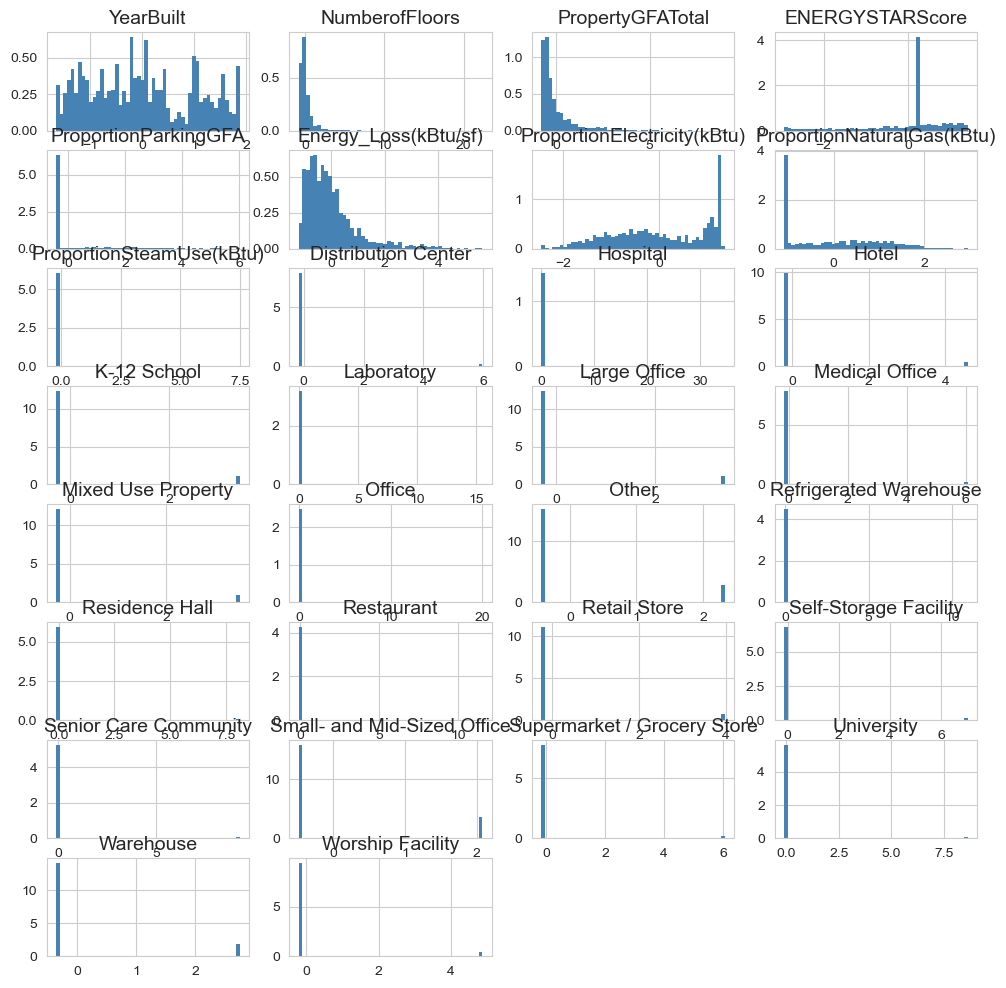

In [11]:
fig = plt.figure(figsize=(12,12))

for feat_idx in range(X_train_std.shape[1]):
    ax = fig.add_subplot(8,4, (feat_idx+1))
    h = ax.hist(X_train_std[:, feat_idx], bins=50, color = 'steelblue', density=True, edgecolor='none')
    ax.set_title(X.columns[feat_idx], fontsize=14)

## 2. Build Models

### 2.1 Linear Regression

In [12]:
#Create a LinearRegression object
lr= LinearRegression()
#Fit X and y
estimator_linear = lr.fit(X_train_std, y_train)
ypred = lr.predict(X_test_std)

#Metrics to evaluate your model
print('LINEAR')
print('r2 score:',r2_score(y_test, ypred))
print('mean absolute error',mean_absolute_error(y_test, ypred))
print('RMSE',np.sqrt(mean_squared_error(y_test, ypred)))

LINEAR
r2 score: 0.5749348190896282
mean absolute error 53.74543175094823
RMSE 90.15512600548533


### 2.2 Decision Tree

In [13]:
dt = DecisionTreeRegressor()
estimator_tree= dt.fit(X_train_std, y_train)
yhat = dt.predict(X_test_std)


print('DECISION TREE')
print('r2 score:',r2_score(y_test, yhat))
print('mean absolute error',mean_absolute_error(y_test, yhat))
print('RMSE',np.sqrt(mean_squared_error(y_test, yhat)))

DECISION TREE
r2 score: 0.526856781198388
mean absolute error 38.18504950495049
RMSE 95.11718067592192


In [14]:
# transfo log utile pour target values tres larges avec outliers etales.

### 2.3 Random Forest

In [15]:
forest = RandomForestRegressor()
estimator_forest = forest.fit(X_train_std, y_train)
y_pred_forest = forest.predict(X_test_std)

print('RANDOM FOREST')
print('R2 score:',r2_score(y_test,y_pred_forest))
print('mean absolute error:',mean_absolute_error(y_test,y_pred_forest))
print('RMSE',np.sqrt(mean_squared_error(y_test, y_pred_forest)))

RANDOM FOREST
R2 score: 0.8694977471014744
mean absolute error: 21.760219801980195
RMSE 49.95416035301615


#### 2.3 [GridSearchCV]

In [22]:
from sklearn.model_selection import GridSearchCV

estimator = RandomForestRegressor()
param_grid = {
    "criterion"         : ['squared_error','absolute_error'],
    "n_estimators"      : [50,60,70,80],
    "max_features"      : [1.0,20,25],
    "max_depth"         : [8,None],
    "min_samples_leaf"  : [1,2],
    "min_samples_split" : [2,4],
}

grid = GridSearchCV(estimator, param_grid, cv=5, n_jobs=-1)

In [23]:
grid.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [8, None], 'max_features': [1.0, 20, 25],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 60, 70, 80]})

In [24]:
grid.best_score_ , grid.best_params_

(0.7882060451098137,
 {'criterion': 'absolute_error',
  'max_depth': None,
  'max_features': 1.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 80})

In [25]:
for mean, std, params in zip(grid.cv_results_['mean_test_score'],
                            grid.cv_results_['std_test_score'],
                            grid.cv_results_['params']
                            ):
    print("\taccuracy = %0.3f (+/-%0.3f) for %s" % (mean,
                                                    std *2,
                                                    params))

	accuracy = 0.773 (+/-0.140) for {'criterion': 'squared_error', 'max_depth': 8, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
	accuracy = 0.767 (+/-0.132) for {'criterion': 'squared_error', 'max_depth': 8, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
	accuracy = 0.771 (+/-0.126) for {'criterion': 'squared_error', 'max_depth': 8, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}
	accuracy = 0.760 (+/-0.143) for {'criterion': 'squared_error', 'max_depth': 8, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 80}
	accuracy = 0.768 (+/-0.155) for {'criterion': 'squared_error', 'max_depth': 8, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50}
	accuracy = 0.766 (+/-0.141) for {'criterion': 'squared_error', 'max_depth': 8, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimator

##### [RESULT GridSearch] R2 score = 0.788 (+/-0.149) for {'criterion': 'absolute_error', 'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 80}

### 2.4 Gradient Boosting

In [26]:
model_gradient = GradientBoostingRegressor()
estimator_gradient = model_gradient.fit(X_train_std,y_train)
y_pred_gradient = model_gradient.predict(X_test_std)

print(model_gradient.score(X_test_std, y_test))

print('R2 score:',r2_score(y_test,y_pred_gradient))
print('mean absolute error:',mean_absolute_error(y_test,y_pred_gradient))
print('RMSE',np.sqrt(mean_squared_error(y_test, y_pred_gradient)))

0.8522329653328968
R2 score: 0.8522329653328968
mean absolute error: 24.212085787622133
RMSE 53.15589539724503


### 2.5 Logarithm Transformation for Gradient Boosting

In [86]:
model_gradient_log = GradientBoostingRegressor()
estimator_gradient_log = model_gradient_log.fit(X_Logtrain_std,y_Logtrain)
y_pred_gradient_log = model_gradient_log.predict(X_Logtest_std)
y_pred_gradient_log = np.exp(y_pred_gradient_log) - 1

print('r2 score antilog:',r2_score(np.exp(y_Logtest) - 1, y_pred_gradient_log))
print('mean absolute error antilog:',mean_absolute_error(np.exp(y_Logtest) - 1,y_pred_gradient_log))
print('RMSE antilog',np.sqrt(mean_squared_error(np.exp(y_Logtest) - 1,y_pred_gradient_log)))

r2 score antilog: 0.9226988240102175
mean absolute error antilog: 17.016205204133126
RMSE antilog 38.446402606463586


#### 2.4 [GridSearchCV] Log Gradient Boosting

In [105]:
estimator_log = GradientBoostingRegressor()
param_grid = {
    "loss"              : ['squared_error'], #mean residuals vs median residuals
    "n_estimators"      : [70,80,100],
    "learning_rate"     : [0.1,0.05],
    "max_features"      : [1.0,20,25],
    "subsample"         : [1.0, 0.7],
    'max_depth'         : [4,8],
    "min_samples_split" : [2,4],
}

grid_gradient_log = GridSearchCV(estimator_log, param_grid, n_jobs=-1, cv=5)

In [106]:
grid_gradient_log.fit(X_Logtrain_std, y_Logtrain)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05],
                         'loss': ['squared_error'], 'max_depth': [4, 8],
                         'max_features': [1.0, 20, 25],
                         'min_samples_split': [2, 4],
                         'n_estimators': [70, 80, 100],
                         'subsample': [1.0, 0.7]})

In [107]:
grid_gradient_log.best_score_ , grid_gradient_log.best_params_

(0.9554787754728753,
 {'learning_rate': 0.1,
  'loss': 'squared_error',
  'max_depth': 4,
  'max_features': 25,
  'min_samples_split': 4,
  'n_estimators': 100,
  'subsample': 0.7})

In [50]:
for mean, std, params in zip(grid_gradient_log.cv_results_['mean_test_score'],
                             grid_gradient_log.cv_results_['std_test_score'],
                             grid_gradient_log.cv_results_['params']
                             ):
    print("\taccuracy = %0.3f (+/-%0.3f) for %s" % (mean,
                                                    std *2,
                                                    params))

	accuracy = 0.949 (+/-0.020) for {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 4, 'max_features': 1.0, 'min_samples_split': 2, 'n_estimators': 250, 'subsample': 1.0}
	accuracy = 0.953 (+/-0.018) for {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 4, 'max_features': 1.0, 'min_samples_split': 2, 'n_estimators': 250, 'subsample': 0.7}
	accuracy = 0.948 (+/-0.016) for {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 4, 'max_features': 1.0, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 1.0}
	accuracy = 0.955 (+/-0.012) for {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 4, 'max_features': 1.0, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.7}
	accuracy = 0.949 (+/-0.019) for {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 4, 'max_features': 1.0, 'min_samples_split': 2, 'n_estimators': 400, 'subsample': 1.0}
	accuracy = 0.956 (+/-0.020) for {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 4

##### [RESULT] R2 score = 0.960 (+/-0.014) for {'learning_rate': 0.05, 'loss': 'squared_error', 'max_depth': 4, 'max_features': 20, 'min_samples_split': 2, 'n_estimators': 250, 'subsample': 0.7}

#### 2.4 [Performance of Grid Search params on test data]

In [60]:
y_pred_gradient_grid_log = grid_gradient_log.predict(X_Logtest_std)

In [67]:
print(r2_score(y_Logtest, np.exp(y_pred_gradient_grid_log)))
print(mean_absolute_error(y_Logtest, np.exp(y_pred_gradient_grid_log)))
print(np.sqrt(mean_squared_error(y_Logtest,np.exp(y_pred_gradient_grid_log))))

0.9491254722437542
14.783367013102662
31.189819001794763


### 3. Model Visualization

In [90]:
y_test  = y_test.reset_index(drop= True)

y_Logtest  = y_Logtest.reset_index(drop= True)
y_Logtest = np.exp(y_Logtest) - 1

In [41]:
def prep_for_visualization(target_pred,target_test):
    target_pred_as_series = pd.Series(target_pred)
    data_tree = pd.concat([target_test, target_pred_as_series], axis=1)
    return ModelVizualizationData(target_pred_as_series, data_tree)

In [42]:
# mes donnees sont trop heterogenes - ex: les valeurs tres eleves sont pas assez representes ce qui fait que les valeurs explosent pour ce type de batiment,

In [72]:
def visualize(y_tests, model_visualization_data,title_as_string, color_points_as_string, color_line_as_string):

    plt.scatter(y_tests, model_visualization_data.target_as_serie, c =color_points_as_string)
    line_coords = np.arange(model_visualization_data.data_model.min().min(),
                            model_visualization_data.data_model.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
                color=color_line_as_string, linestyle='--')
    plt.ylabel('Predicted GHG emissions in tons of carbon dioxide', fontsize=14)
    plt.xlabel('Actual GHG emissions in tons of carbon dioxide', fontsize=14)
    plt.title(title_as_string, fontsize=16)
    return plt.show()

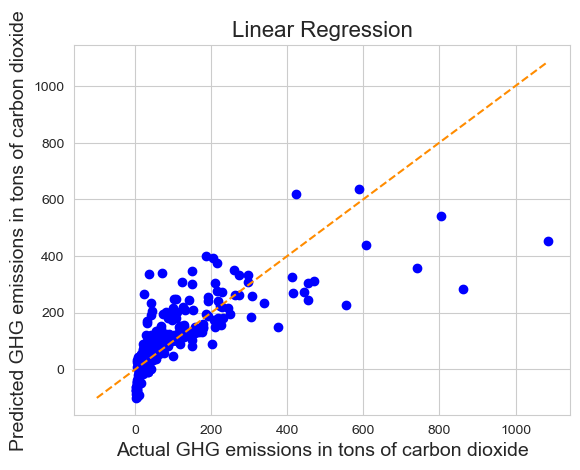

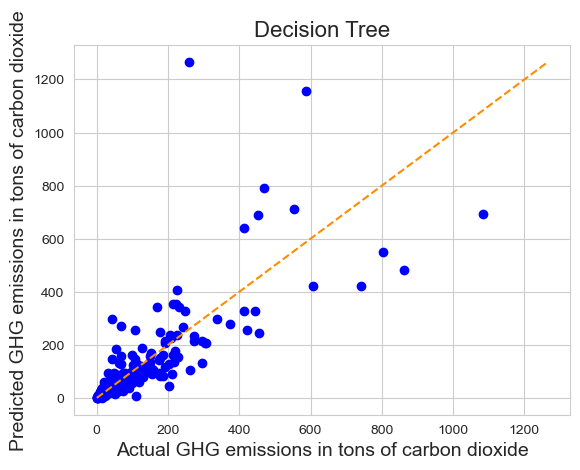

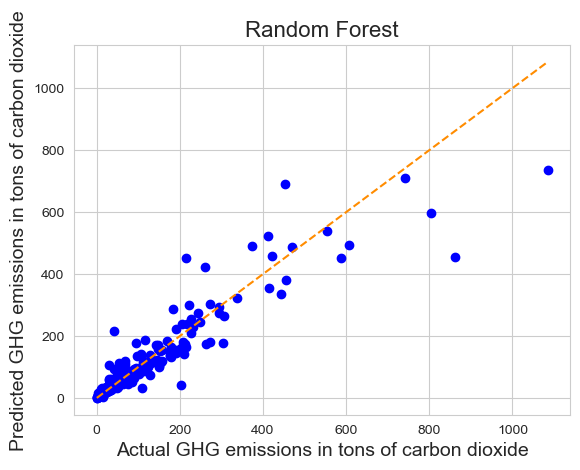

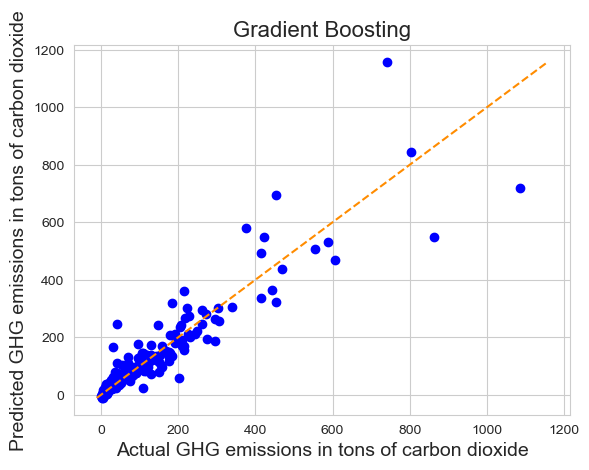

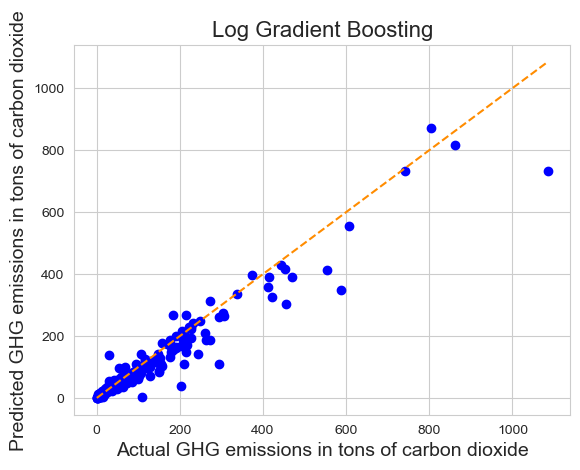

In [93]:
visualize(y_test, prep_for_visualization(ypred, y_test),'Linear Regression', 'blue', 'darkorange')
visualize(y_test, prep_for_visualization(yhat, y_test),'Decision Tree', 'blue', 'darkorange')
visualize(y_test, prep_for_visualization(y_pred_forest, y_test),'Random Forest', 'blue', 'darkorange')
visualize(y_test, prep_for_visualization(y_pred_gradient, y_test),'Gradient Boosting', 'blue', 'darkorange')
visualize(y_Logtest, prep_for_visualization(y_pred_gradient_log, y_Logtest),'Log Gradient Boosting', 'blue', 'darkorange')

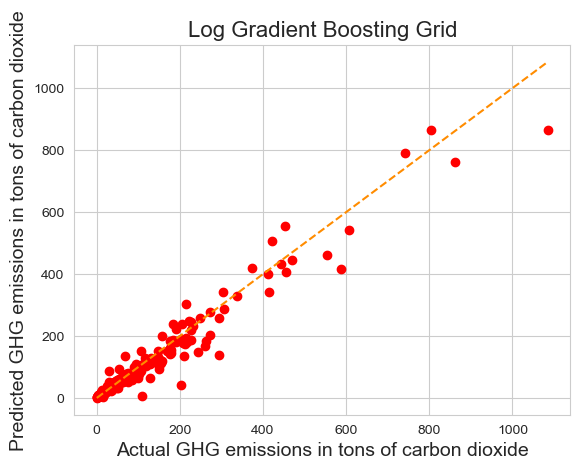

In [92]:
visualize(y_Logtest, prep_for_visualization(np.exp(y_pred_gradient_grid_log), y_Logtest),'Log Gradient Boosting Grid', 'red', 'darkorange')

<AxesSubplot:>

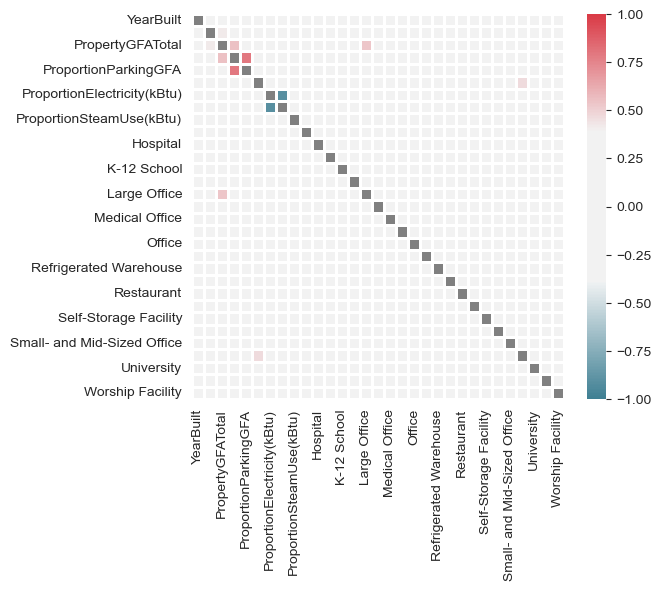

In [116]:
corr = X.corr()

mask = np.zeros_like(corr, dtype=bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=130)
cmap.set_bad('grey')

sns.heatmap(corr,mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=2 )

Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.


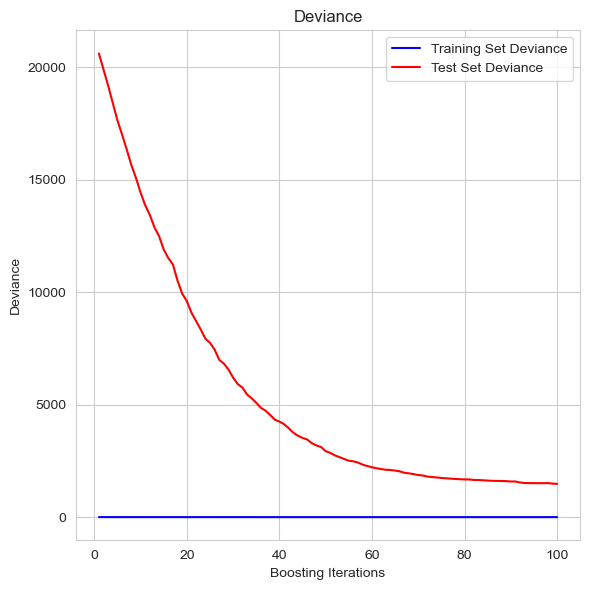

In [98]:
test_score = np.zeros(100, dtype=np.float64)
for i, y_pred in enumerate(model_gradient_log.staged_predict(X_Logtest_std)):
    test_score[i] = model_gradient_log.loss_(y_Logtest, np.exp(y_pred)-1)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(100) + 1,
    model_gradient_log.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(100) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

## 4. Feature Importance Analysis

In [92]:
shap.initjs()



### 4.1 Random Forest

In [98]:
forest_reg_explainer1 = shap.TreeExplainer(forest, X_train_std)

In [99]:
sample_idx = 0

shap_vals = forest_reg_explainer1.shap_values(X_test_std[sample_idx])

print("Expected/Base Value : ", forest_reg_explainer1.expected_value)
print()
print("Shap Values for Sample %d : "%sample_idx, shap_vals)
print("\n")
print("Prediction From Model                            : ", forest.predict(X_test_std[sample_idx].reshape(1,-1))[0])
print("Prediction From Adding SHAP Values to Base Value : ", forest_reg_explainer1.expected_value + shap_vals.sum())

Expected/Base Value :  105.290868

Shap Values for Sample 0 :  [ 1.41692130e-01 -2.67698944e+00 -6.76608233e+01  1.08085520e+00
 -3.51984024e+01 -9.47408704e-04 -2.60946706e-03  3.70424086e-02
 -5.18820427e-02  0.00000000e+00 -2.49835154e-02  0.00000000e+00
  2.10395371e-03 -1.32459040e-02  2.07649991e-03 -1.87009137e-01
 -7.24999607e-04 -1.84138168e-03  0.00000000e+00  8.72409551e-04
 -5.54585733e-04  0.00000000e+00 -5.30237214e-03  1.02598169e-01
 -3.05435647e-02  4.20287112e-02  2.97951045e-02  3.45571891e+01
  2.36394080e+00 -1.09300786e+00]


Prediction From Model                            :  36.67359999999999
Prediction From Adding SHAP Values to Base Value :  36.70219512929853


#### 4.1 [Random Forest] Global Feature Importance

100%|===================| 1206/1211 [00:57<00:00]        

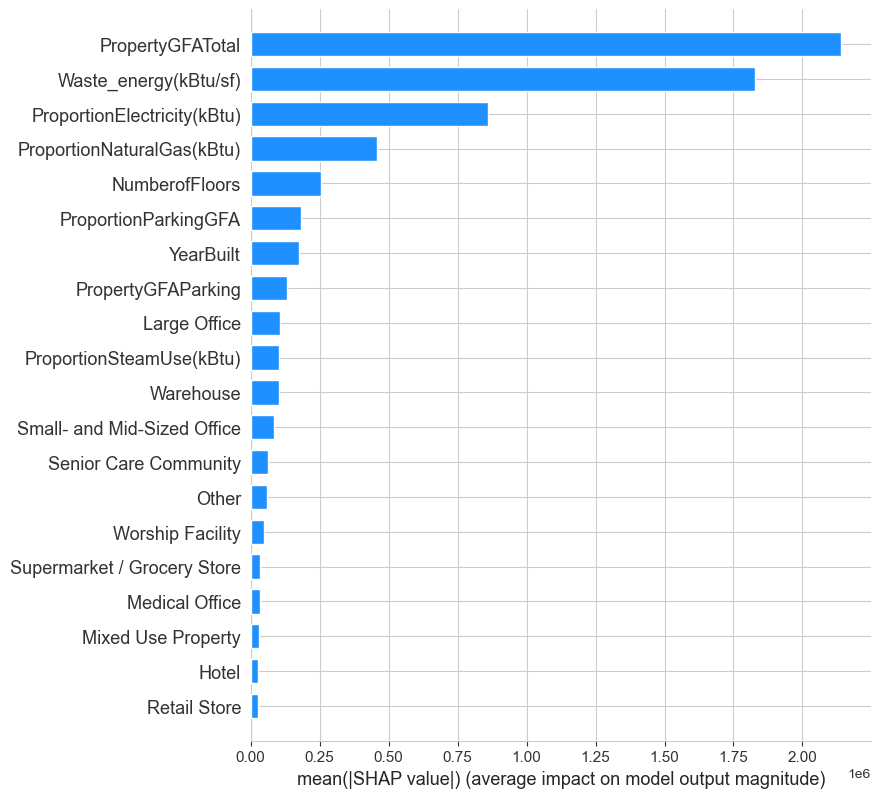

In [70]:
shap.summary_plot(forest_reg_explainer1.shap_values(X_train_std),
                  feature_names=df.columns,
                  plot_type="bar",
                  color="dodgerblue"
                  )

In [100]:
shap.summary_plot(forest_reg_explainer1.shap_values(X_train_std),
                  features = X_train_std,
                  feature_names=df.columns)

 98%|===================| 1182/1209 [00:34<00:00]        

Exception: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 165.119702, while the model output was 179.008100. If this difference is acceptable you can set check_additivity=False to disable this check.

### 4.2 Gradient Boosting

In [99]:
grad_reg_explainer1_log = shap.TreeExplainer(model_gradient_log, X_Logtrain_std)

In [100]:
sample_idx = 0

shap_vals = grad_reg_explainer1_log.shap_values(X_Logtest_std[sample_idx])

print("Expected/Base Value : ", grad_reg_explainer1_log.expected_value)
print()
print("Shap Values for Sample %d : "%sample_idx, shap_vals)
print("\n")
print("Prediction From Model                            : ", model_gradient_log.predict(X_Logtest_std[sample_idx].reshape(1,-1))[0])
print("Prediction From Adding SHAP Values to Base Value : ", grad_reg_explainer1_log.expected_value + shap_vals.sum())

Expected/Base Value :  4.0257154926717815

Shap Values for Sample 0 :  [ 1.23226262e-03 -5.87159082e-03 -7.12048775e-01  4.62722674e-03
  1.34131609e-02 -8.86283638e-01  9.60903842e-01  4.19137783e-01
 -3.07013987e-02  3.04196611e-03  0.00000000e+00  1.35211814e-04
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.47399399e-04 -1.73241165e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.88036049e-04  0.00000000e+00  0.00000000e+00
  3.86390183e-04  0.00000000e+00]


Prediction From Model                            :  3.792690963904185
Prediction From Adding SHAP Values to Base Value :  3.79269095800749


#### 4.1 [Gradient Boosting] Global Feature Importance

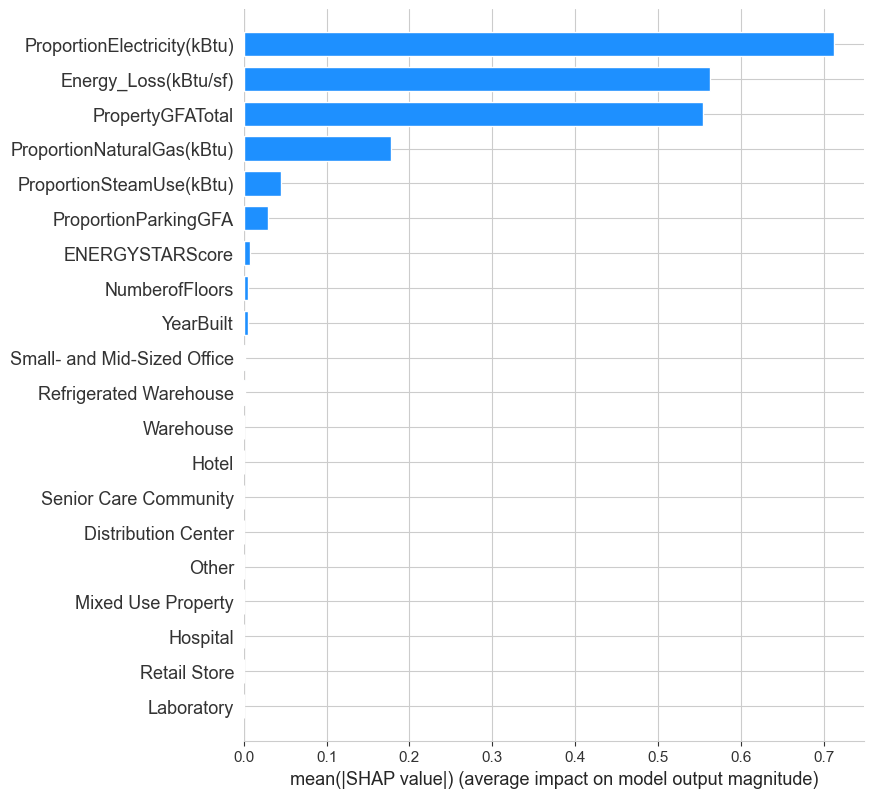

In [101]:
shap.summary_plot(grad_reg_explainer1_log.shap_values(X_Logtrain_std),
                  feature_names=df.columns,
                  plot_type="bar",
                  color="dodgerblue"
                  )

### 4.4 [Gradient Boosting] Local Feature Importance

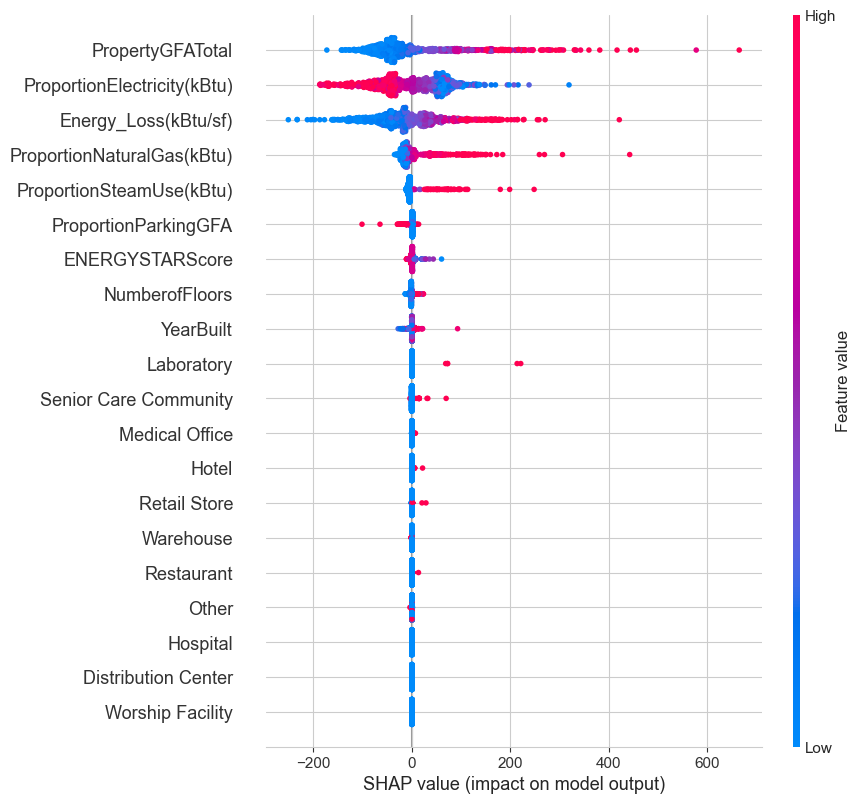

In [106]:
shap.summary_plot(grad_reg_explainer1.shap_values(X_train_std),
                  features = X_train_std,
                  feature_names=df.columns, show= False)
plt.gcf().axes[-1].set_aspect(100)
plt.gcf().axes[-1].set_box_aspect(100)